<a href="https://colab.research.google.com/github/sharvanitamaskar/PrivatePCA/blob/main/PrivatePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
#synthetic matrix with random values
np.random.seed(0)  #reproducibility
A = np.random.rand(5, 5)
print("Synthetic Matrix A:\n", A)

Synthetic Matrix A:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]


In [ ]:
#SVD
U, S, VT = np.linalg.svd(np.dot(A.T,A))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of A
#square roots of the eigenvalues AA(t)
print("VT:\n", VT) #contains the right singular vectors of A
#captures features and pattersn of A


U:
 [[-0.46244415 -0.51057851  0.09176013  0.28305421 -0.66099575]
 [-0.37433491 -0.4511496  -0.65396828 -0.16700935  0.44807453]
 [-0.48621121  0.37303038  0.03126873 -0.74467933 -0.26252992]
 [-0.58734861  0.11251064  0.54285123  0.27963195  0.51911606]
 [-0.25424214  0.61964773 -0.51791927  0.5091629  -0.15462984]]
Singular Values: [9.36536541e+00 1.16434614e+00 1.66892224e-01 2.00733099e-02
 2.55348175e-03]
VT:
 [[-0.46244415 -0.37433491 -0.48621121 -0.58734861 -0.25424214]
 [-0.51057851 -0.4511496   0.37303038  0.11251064  0.61964773]
 [ 0.09176013 -0.65396828  0.03126873  0.54285123 -0.51791927]
 [ 0.28305421 -0.16700935 -0.74467933  0.27963195  0.5091629 ]
 [-0.66099575  0.44807453 -0.26252992  0.51911606 -0.15462984]]


In [ ]:
#creating samples using gaussian distribution
# Parameters for the Gaussian distribution
mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution

# shape of the output matrix
rows = 100
columns = 100

# creating matrix
Ag = np.random.normal(mean, std_dev, size=(rows, columns))
print("Sample Matrix A with Gaussian Distribution:\n", A)

Sample Matrix A with Gaussian Distribution:
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]


In [ ]:
U, S, VT = np.linalg.svd(np.dot(Ag.T,Ag))
print("U:\n", U) #direction in the original space where your data lies.
print("Singular Values:", S) #contains the singular values of Ag
#square roots of the eigenvalues AgAg(t)
print("VT:\n", VT) #contains the right singular vectors of Ag
#captures features and pattersn of Ag

U:
 [[-0.12818646  0.1413086  -0.17539892 ...  0.07346087  0.21563518
   0.05980906]
 [ 0.05631963  0.18679153 -0.01748181 ...  0.05520305 -0.03504815
   0.12453561]
 [ 0.13138262  0.01102682  0.1438969  ... -0.01627353 -0.07350515
   0.05776369]
 ...
 [ 0.08296228  0.14349348  0.08886432 ...  0.01063406  0.08986287
  -0.16759021]
 [ 0.16420693  0.11992757  0.11159833 ...  0.03217792 -0.18643905
   0.06224664]
 [-0.04105789  0.00087949  0.00645139 ...  0.09317908  0.06354286
  -0.01761327]]
Singular Values: [3.75680520e+02 3.60569004e+02 3.33888451e+02 3.17659674e+02
 3.09722685e+02 3.01232585e+02 2.83959196e+02 2.78519257e+02
 2.69986707e+02 2.63129502e+02 2.52053169e+02 2.44750623e+02
 2.36245266e+02 2.30463864e+02 2.23688633e+02 2.18893114e+02
 2.12352566e+02 2.01260687e+02 1.95371570e+02 1.90707914e+02
 1.87291530e+02 1.83444720e+02 1.75115984e+02 1.70757501e+02
 1.63195433e+02 1.54349274e+02 1.48120908e+02 1.44564201e+02
 1.39235409e+02 1.34366706e+02 1.32483652e+02 1.28264111e+02

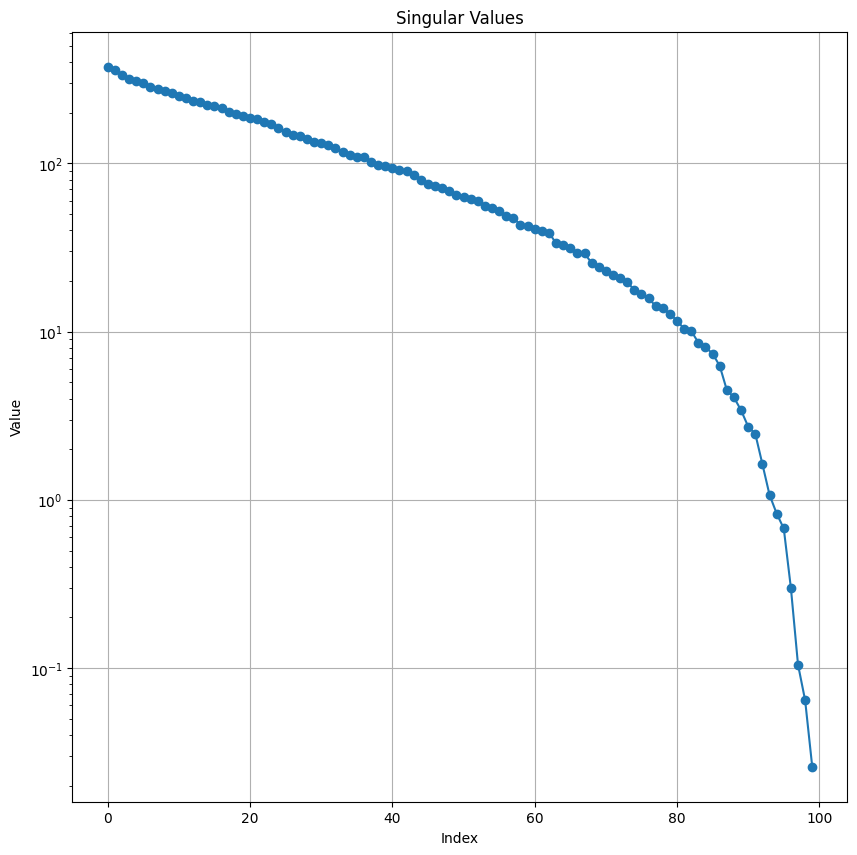

In [ ]:
import matplotlib.pyplot as plt
# Plotting the singular values
plt.figure(figsize=(10, 10))
plt.plot(S, marker='o')
plt.title('Singular Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.yscale('log')
# Log scale to see the drop off graph clearly
plt.grid(True)
plt.show()

In [ ]:
k = 90
U_k = U[:, :k] # We select first k columns of U
S_diag = np.diag(S) #Then convert S into a diagonal matrix
S_k = S_diag[:k, :k] #We take the first k singular values (top-left k x k submatrix of S_diag)
VT_k = VT[:k, :] #Select the first k rows of VT
A_k = np.dot(U_k, np.dot(S_k, VT_k)) #rank-k approximation
print("Rank-k Approximation of AgAg^T:\n", A_k)

Rank-k Approximation of AgAg^T:
 [[117.04414803   8.65794695 -13.21173327 ...   8.83808928 -11.24265032
    0.76736665]
 [  8.65794695 112.42332264   3.08540828 ...  15.19149764  -3.36608303
   16.72790866]
 [-13.21173327   3.08540828 100.39161163 ...   5.93402569   6.25917766
    0.92182359]
 ...
 [  8.83808928  15.19149764   5.93402569 ... 101.04207933   7.49059057
   -3.06578982]
 [-11.24265032  -3.36608303   6.25917766 ...   7.49059057 103.48379353
    3.18323308]
 [  0.76736665  16.72790866   0.92182359 ...  -3.06578982   3.18323308
   87.01827475]]


In [ ]:
noise_mean = 0  #mean of the Gaussian noise
noise_std_dev = 0.1  #std deviation of the Gaussian noise
rows, columns = Ag.shape #Shape of Ag
noise = np.random.normal(noise_mean, noise_std_dev, (rows, columns))
#generating Gaussian noise with the same shape
Ag_noisy = Ag + noise #adding the noise
print("Rank-k Approximation of AgAg^T with Gaussian Noise:\n", Ag_noisy)

Rank-k Approximation of AgAg^T with Gaussian Noise:
 [[-0.91110239  0.16519664  0.07910584 ... -1.74565118  1.63249333
   1.93308295]
 [ 1.39171054  1.39452933  1.07624571 ...  0.965503   -0.68532299
   0.21783969]
 [ 0.36386274  0.10219291 -0.3258931  ...  0.5079977  -0.22927691
  -1.07032934]
 ...
 [-0.16457965 -1.41995692  0.03744494 ...  1.25144198 -1.04728163
  -1.95303448]
 [-2.74741952  1.90084214 -0.37165086 ...  0.06032767 -0.16437336
   0.13579679]
 [-0.63240996 -0.06666218 -0.029824   ... -0.09401662 -0.77666528
   0.13080411]]


In [ ]:
Un, Sn, VTn = np.linalg.svd(np.dot(Ag_noisy.T,Ag_noisy))
print("Un:\n", Un)
print("Singular Values:", Sn)
print("VTn:\n", VTn)

Un:
 [[-0.13340735  0.14071558 -0.1611706  ... -0.05790253 -0.05146695
  -0.17376407]
 [ 0.03662847  0.17016733  0.00931223 ...  0.13512562  0.01534129
  -0.08153056]
 [ 0.11071079 -0.03408643  0.20358606 ...  0.05652168  0.04325958
   0.02983494]
 ...
 [ 0.07260496  0.12946612  0.11663309 ... -0.16544362  0.02446996
   0.02911563]
 [ 0.18626164  0.11131461  0.08870068 ...  0.12863674  0.07219302
   0.05771198]
 [-0.07209384 -0.01726589  0.03055324 ... -0.01890098  0.00063836
  -0.08304793]]
Singular Values: [3.85367333e+02 3.62158175e+02 3.35993827e+02 3.25601643e+02
 3.14142950e+02 3.06376034e+02 2.88674453e+02 2.80615617e+02
 2.72900809e+02 2.59823250e+02 2.54601942e+02 2.45647319e+02
 2.38473441e+02 2.37167744e+02 2.25306779e+02 2.17955132e+02
 2.11762696e+02 2.01059661e+02 1.97328161e+02 1.94642350e+02
 1.90987814e+02 1.80391207e+02 1.78810423e+02 1.72031144e+02
 1.64546846e+02 1.52548617e+02 1.49509905e+02 1.44352868e+02
 1.35819297e+02 1.33242486e+02 1.30332269e+02 1.28681053e+0

In [ ]:
k = 90
U_nk = Un[:, :k]
S_ndiag = np.diag(Sn)
S_nk = S_diag[:k, :k]
VT_nk = VTn[:k, :]
A_nk = np.dot(U_nk, np.dot(S_nk, VT_nk))
print("Rank-k Approximation of Ag_noisy^T:\n", A_nk)

Rank-k Approximation of Ag_noisy^T:
 [[115.06997695   8.75449592 -12.43452825 ...   7.02696595  -9.70069775
    1.99004823]
 [  8.75449592 110.0060406    2.80904632 ...  17.37091047  -3.77240733
   16.03686817]
 [-12.43452825   2.80904632  99.45252336 ...   6.21856941   4.96059697
    0.45024984]
 ...
 [  7.02696595  17.37091047   6.21856941 ... 100.35572956   7.79059374
   -3.67088455]
 [ -9.70069775  -3.77240733   4.96059697 ...   7.79059374  99.95963787
    0.27853147]
 [  1.99004823  16.03686817   0.45024984 ...  -3.67088455   0.27853147
   89.08795494]]


In [ ]:
mse = np.mean((A_nk - A_k) ** 2)
print("MSE", mse)

MSE 2.0620674222922797
